<a href="https://colab.research.google.com/github/brunarigo/DS-project01-datasus-analysis/blob/main/Notebooks/Project01_Datasus_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [406]:
import pandas as pd

In [407]:
URL1 = 'https://raw.githubusercontent.com/brunarigo/DS-project01-datasus-analysis/main/Data/A170947189_28_143_208_ABCLocInt.csv'
URL2 = 'https://raw.githubusercontent.com/brunarigo/DS-project01-datasus-analysis/main/Data/A171230189_28_143_208_ABCLocRes.csv'

In [408]:
#Importando Local Internação - Cidades Grande ABC - SP
dados_local_internacao = pd.read_csv(URL1, encoding='ISO-8859-1', sep=";", thousands=".", decimal=",")
dados_local_internacao.head()

,Município,2019/Fev,2019/Mar,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,351380 Diadema,-,-,-,-,-,"73082,85","239080,55","408775,57",629417.24,1375267.27,1570495.95,1542875.88,1386763.10,1682137.18,1878451.44,1815014.97,1834976.08,1592558.79,1580736.25,1675516.76,1655843.60,1546726.06,1414870.04,1069797.10,"449430,36",25421817.04
1,352940 Mauá,-,-,-,-,-,-,-,"543,79",298461.27,750717.25,1141079.99,1043326.36,986994.48,948350.46,1198249.67,1359856.37,1212006.66,1241777.45,1261243.21,1513813.72,1270365.08,1147436.34,1135371.21,1004413.59,"359050,66",17873057.56
2,354330 Ribeirão Pires,-,-,-,-,-,-,-,"958,66",28837.10,76958.29,81214.02,75340.08,84030.75,81924.52,204943.35,182898.53,173233.49,151949.66,153919.21,159487.91,173234.40,184018.52,215306.03,217136.51,"112182,93",2357573.96
3,354780 Santo André,"3330,83","3294,57","3466,49","3628,35","12926,40","40284,33","14329,29","115159,33",626889.33,1813657.86,2904044.52,2579566.57,2716686.93,2802996.49,4310978.08,4117297.68,4314444.24,4037697.65,3682132.31,4009177.05,4421552.55,4818207.31,2210176.85,1053053.71,"624085,28",51239064.00
4,354870 São Bernardo do Campo,-,-,-,-,"50095,36","46628,94","11470,95","13818,66",449909.36,2510648.59,3603566.75,3492608.04,3573512.21,4728146.62,5454918.66,5392551.39,5471503.41,5499147.01,6862261.02,6507471.14,7428421.06,9029122.08,9289677.45,8271066.85,"4950623,34",92637168.89


In [409]:
#Importando Local de Residência - Cidades Grande ABC - SP
dados_local_residencia = pd.read_csv(URL2, encoding='ISO-8859-1', sep=";", thousands=".", decimal=",")
dados_local_residencia.head()

,Município,2019/Mar,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,351380 Diadema,-,-,-,-,"66782,94","145717,45","340377,73",577788.39,1388154.13,1625685.56,1620262.59,1357307.38,1883251.89,2409991.72,2437493.71,2232783.85,1994629.12,1775210.23,1901317.90,2164084.77,2054346.70,2017072.42,1628096.41,845460.97,30465815.86
1,352940 Mauá,-,-,-,-,-,"71073,01","75017,10",296275.18,931236.26,1294407.11,1353246.49,1320790.70,1284858.71,1509101.96,2302023.72,2209283.88,1588775.24,1623600.90,1823194.15,1754046.47,2181236.29,1829344.78,1664225.17,529343.37,25641080.49
2,354330 Ribeirão Pires,-,-,-,-,-,-,"54683,92",66550.69,242654.05,302321.32,295898.24,280818.83,340946.84,320788.23,350160.63,309085.09,458820.39,406025.93,392225.85,350818.91,377184.07,314220.61,336356.31,209522.10,5409082.01
3,354410 Rio Grande da Serra,-,-,-,-,-,-,-,45490.48,120333.08,122621.17,70815.71,88454.02,65124.62,136490.96,177072.90,177360.80,160545.84,227311.99,98170.07,100566.23,183346.75,126089.90,158703.38,42324.35,2100822.25
4,354780 Santo André,"3294,57","3466,49","3628,35","12926,40","40284,33","10958,00","199533,26",861694.32,1869242.66,3453461.25,2807859.71,3000264.56,3038084.42,4246626.42,4412251.79,4797647.57,4448518.05,3832744.49,4452298.97,4657632.56,5308546.65,2625892.17,1490003.84,896510.90,56473371.73


In [410]:
#Inicio tratamento dados Local de Internação: Setando Index, excluindo totais
colunas_com_valores = dados_local_internacao.mean().index.tolist()
colunas_com_valores.insert(0,"Município")
dados_local_internacao = dados_local_internacao[colunas_com_valores]
dados_local_internacao = dados_local_internacao.set_index("Município")
dados_local_internacao = dados_local_internacao.drop("Total", axis=1)
dados_local_internacao = dados_local_internacao.T
dados_local_internacao = dados_local_internacao.drop("Total", axis=1)

In [411]:
#Selecionando período interessante para análise - ultimos 6 meses de dados consistentes
periodo_local_internacao = dados_local_internacao.T
periodo_local_internacao = periodo_local_internacao[["2020/Set","2020/Out","2020/Nov","2020/Dez","2021/Jan","2021/Fev"]]

In [412]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

O IBGE (Instituto Brasileiro de Geografia e Estatística) divulgou em 27/08/2020 as estimativas das populações residentes nos 5.570 municípios brasileiros, com referência em 1º de julho de 2020.</br> 
Nessa data, a população do Brasil chegou a 211,8 milhões de habitantes e a soma das sete cidades do Grande ABC a 2.807.712, sendo:
- São Bernardo do Campo: 844.483
- Sando André: 721.368
- Mauá: 477.552 
- Diadema: 426.757 
- São Caetano 161.957 
- Ribeirão Pires: 124.159 
- Rio Grande da Serra: 51.436 

*Fonte: https://www.dgabc.com.br/Noticia/3532606/grande-abc-tem-2-8-milhoes-de-habitantes-segundo-ibge*


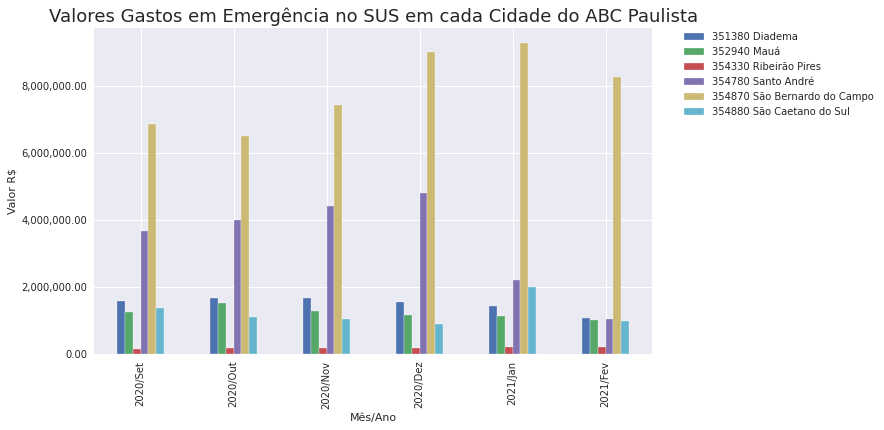

In [413]:
ax = periodo_local_internacao.T.plot(kind='bar',figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
sns.set_style('darkgrid')
plt.xlabel("Mês/Ano")
plt.ylabel("Valor R$")
plt.title("Valores Gastos em Emergência no SUS em cada Cidade do ABC Paulista", fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

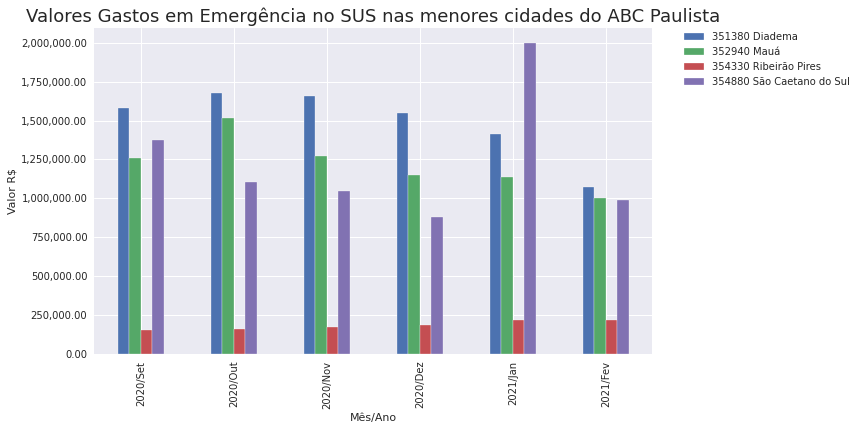

In [414]:
#Selecionando Municipios de Locais de Internaçao das cidades menores do Grande ABC
municipios_int_menor_gasto = periodo_local_internacao.loc[["351380 Diadema","352940 Mauá","354330 Ribeirão Pires", "354880 São Caetano do Sul"]]

ax = municipios_int_menor_gasto.T.plot(kind='bar',figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
sns.set_style('darkgrid')
plt.xlabel("Mês/Ano")
plt.ylabel("Valor R$")
plt.title("Valores Gastos em Emergência no SUS nas menores cidades do ABC Paulista", fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Enquanto tivemos um aumento considerável nos gastos para os municipios com maior quantidade de habitantes durante o pico de casos da Covid, nos meses de Outubro, Novembro e Dezembro, houve uma queda nos gastos para os municipios de menos habitantes, nos mesmos meses.

In [415]:
#Realizando os mesmos processos, porém agora com os gastos considerando a cidade de Residência do paciente e não mais a cidade em que ele foi atendido
#Inicio tratamento dados com gastos no Local de Residência: Setando Index, excluindo totais
colunas_com_valores = dados_local_residencia.mean().index.tolist()
colunas_com_valores.insert(0,"Município")
dados_local_residencia = dados_local_residencia[colunas_com_valores]
dados_local_residencia = dados_local_residencia.set_index("Município")
dados_local_residencia = dados_local_residencia.drop("Total", axis=1)

In [416]:
#Excluindo dados referente ao Munícipio de Rio Grande da Serra. Não existem dados computados desse municipio para a primeira situação (Local de Internação), ele será desconsiderado na análise
dados_local_residencia = dados_local_residencia.T
dados_local_residencia = dados_local_residencia.drop("354410 Rio Grande da Serra", axis=1)

In [417]:
dados_local_residencia = dados_local_residencia.drop("Total", axis=1)

In [418]:
#Selecionando período interessante para análise - ultimos 6 meses de dados consistentes
periodo_local_residencia = dados_local_residencia.T
periodo_local_residencia = periodo_local_residencia[["2020/Set","2020/Out","2020/Nov","2020/Dez","2021/Jan","2021/Fev"]]
periodo_local_residencia

,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev
Município,,,,,,
351380 Diadema,1775210.23,1901317.90,2164084.77,2054346.70,2017072.42,1628096.41
352940 Mauá,1623600.90,1823194.15,1754046.47,2181236.29,1829344.78,1664225.17
354330 Ribeirão Pires,406025.93,392225.85,350818.91,377184.07,314220.61,336356.31
354780 Santo André,3832744.49,4452298.97,4657632.56,5308546.65,2625892.17,1490003.84
354870 São Bernardo do Campo,6878981.32,5949298.76,6441422.46,7224034.17,7809197.19,6865300.08
354880 São Caetano do Sul,1478988.31,1152776.87,1008496.26,910254.29,1953033.32,1081890.08


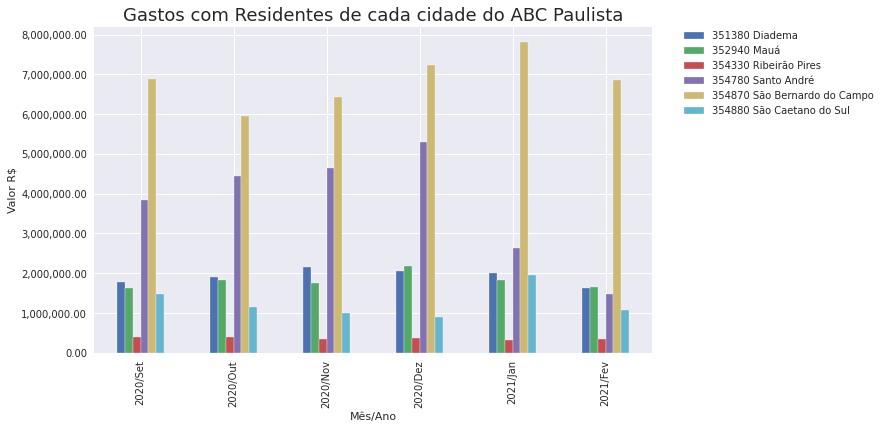

In [419]:
ax = periodo_local_residencia.T.plot(kind='bar',figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
sns.set_style('darkgrid')
plt.xlabel("Mês/Ano")
plt.ylabel("Valor R$")
plt.title("Gastos com Residentes de cada cidade do ABC Paulista", fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [420]:
#Selecionando Municipios de Locais de Residência com Menores Gastos (Abaixo R$2,5 milhões)
municipios_res_menor_gasto = periodo_local_residencia.loc[["351380 Diadema","352940 Mauá","354330 Ribeirão Pires", "354880 São Caetano do Sul"]]
municipios_res_menor_gasto

,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev
Município,,,,,,
351380 Diadema,1775210.23,1901317.90,2164084.77,2054346.70,2017072.42,1628096.41
352940 Mauá,1623600.90,1823194.15,1754046.47,2181236.29,1829344.78,1664225.17
354330 Ribeirão Pires,406025.93,392225.85,350818.91,377184.07,314220.61,336356.31
354880 São Caetano do Sul,1478988.31,1152776.87,1008496.26,910254.29,1953033.32,1081890.08


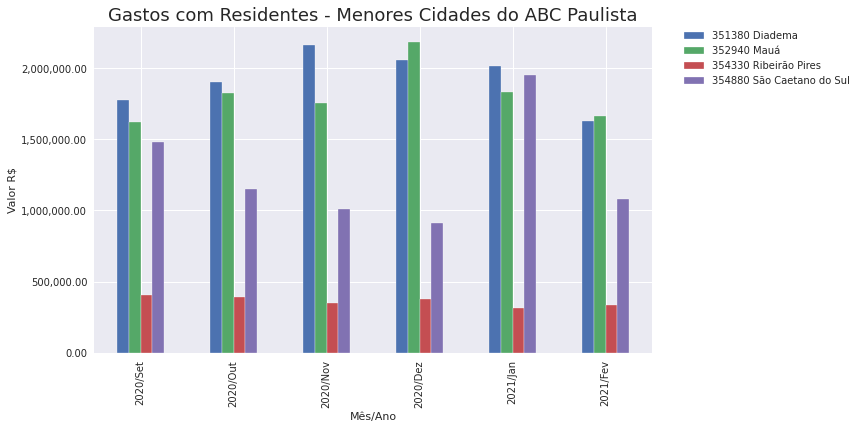

In [421]:
ax = municipios_res_menor_gasto.T.plot(kind='bar',figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
sns.set_style('darkgrid')
plt.xlabel("Mês/Ano")
plt.ylabel("Valor R$")
plt.title("Gastos com Residentes - Menores Cidades do ABC Paulista", fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [422]:
res_diadema = municipios_res_menor_gasto.T
res_diadema = res_diadema['351380 Diadema']
int_diadema = municipios_int_menor_gasto.T
int_diadema = int_diadema['351380 Diadema']

res_maua = municipios_res_menor_gasto.T
res_maua = res_maua['352940 Mauá']
int_maua = municipios_int_menor_gasto.T
int_maua = int_maua['352940 Mauá']

res_ribeirao = municipios_res_menor_gasto.T
res_ribeirao = res_ribeirao['354330 Ribeirão Pires']
int_ribeirao = municipios_int_menor_gasto.T
int_ribeirao = int_ribeirao['354330 Ribeirão Pires']

res_scs = municipios_res_menor_gasto.T
res_scs = res_scs['354880 São Caetano do Sul']
int_scs = municipios_int_menor_gasto.T
int_scs = int_scs['354880 São Caetano do Sul']

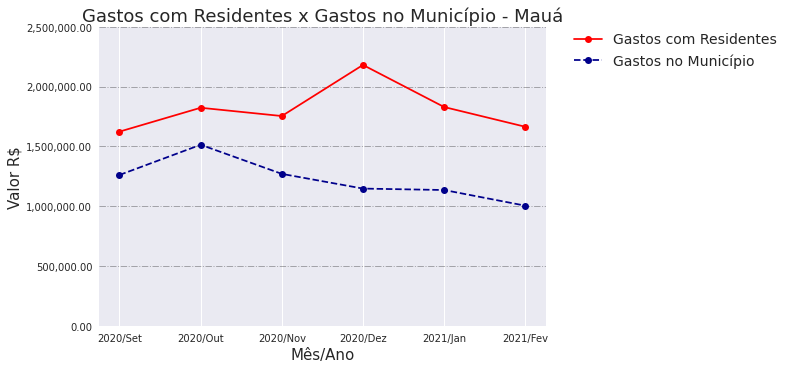

<Figure size 720x432 with 0 Axes>

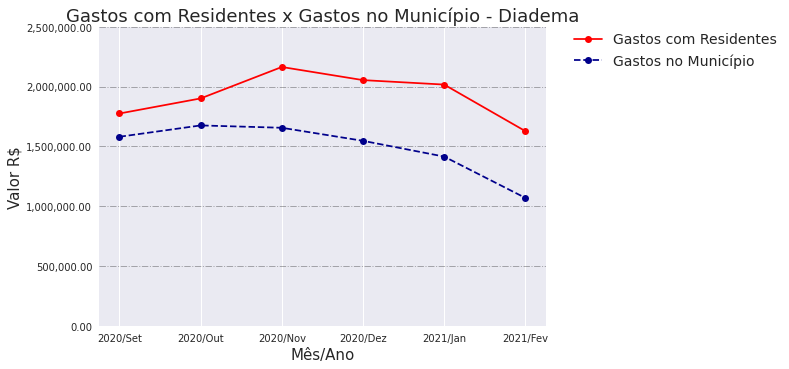

<Figure size 720x432 with 0 Axes>

In [423]:
plt.plot(res_maua, color='red', linestyle='-', marker='o', markersize = 7)
plt.plot(int_maua.T, color='darkblue',linestyle='--', marker='o', markersize = 7)
plt.ylim(0,2500000.00)
plt.xlabel('Mês/Ano', fontsize=15)
plt.ylabel('Valor R$', fontsize=15)
plt.title('Gastos com Residentes x Gastos no Município - Mauá', fontsize=18)
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(['Gastos com Residentes','Gastos no Município'], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(10, 6))
plt.show()

plt.plot(res_diadema, color='red', linestyle='-', marker='o', markersize = 7)
plt.plot(int_diadema.T, color='darkblue', linestyle='--', marker='o', markersize = 7)
plt.ylim(0,2500000.00)
plt.xlabel('Mês/Ano', fontsize=15)
plt.ylabel('Valor R$', fontsize=15)
plt.title('Gastos com Residentes x Gastos no Município - Diadema', fontsize=18)
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(['Gastos com Residentes','Gastos no Município'], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(10, 6))
plt.show()


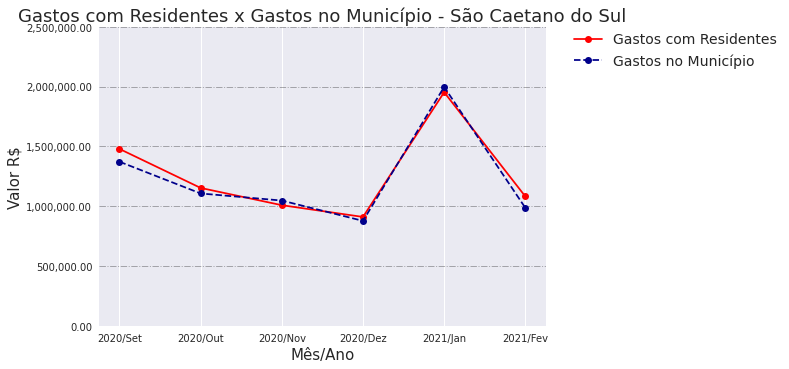

<Figure size 720x432 with 0 Axes>

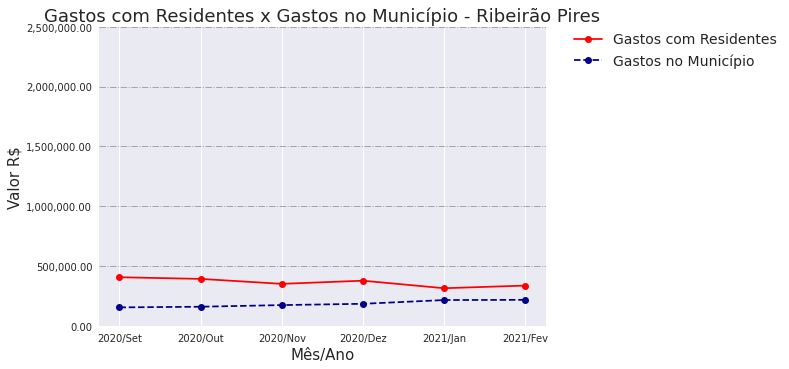

<Figure size 720x432 with 0 Axes>

In [424]:
plt.plot(res_scs, color='red', linestyle='-', marker='o', markersize = 7)
plt.plot(int_scs.T, color='darkblue', linestyle='--', marker='o', markersize = 7)
plt.ylim(0,2500000.00)
plt.xlabel('Mês/Ano', fontsize=15)
plt.ylabel('Valor R$', fontsize=15)
plt.title('Gastos com Residentes x Gastos no Município - São Caetano do Sul', fontsize=18)
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(['Gastos com Residentes','Gastos no Município'], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(10, 6))
plt.show()

plt.plot(res_ribeirao, color='red', linestyle='-', marker='o', markersize = 7)
plt.plot(int_ribeirao.T, color='darkblue', linestyle='--', marker='o', markersize = 7)
plt.ylim(0,2500000.00)
plt.xlabel('Mês/Ano', fontsize=15)
plt.ylabel('Valor R$', fontsize=15)
plt.title('Gastos com Residentes x Gastos no Município - Ribeirão Pires', fontsize=18)
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(['Gastos com Residentes','Gastos no Município'], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(10, 6))
plt.show()

In [425]:
res_sbc = periodo_local_residencia.T
res_sbc = res_sbc['354870 São Bernardo do Campo']
int_sbc = periodo_local_internacao.T
int_sbc = int_sbc['354870 São Bernardo do Campo']

res_sa = periodo_local_residencia.T
res_sa = res_sa['354780 Santo André']
int_sa = periodo_local_internacao.T
int_sa = int_sa['354780 Santo André']

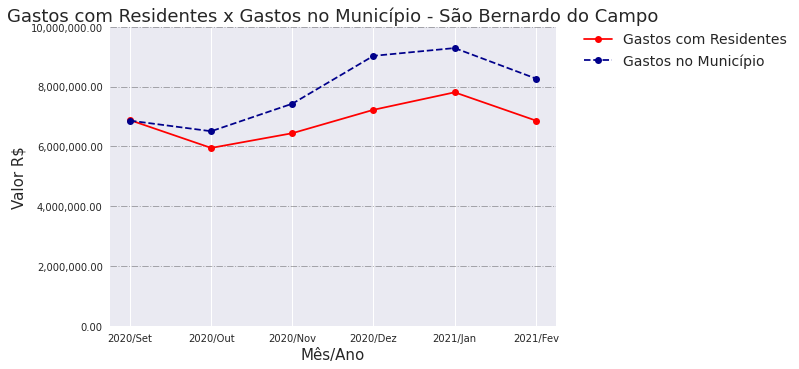

<Figure size 720x432 with 0 Axes>

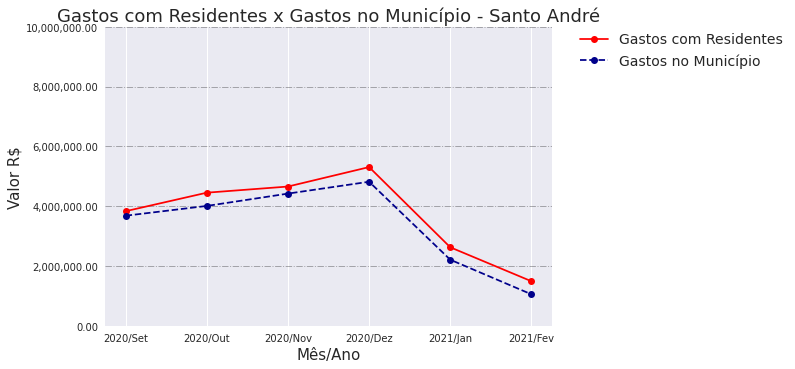

<Figure size 720x432 with 0 Axes>

In [426]:
plt.plot(res_sbc, color='red', linestyle='-', marker='o', markersize = 7)
plt.plot(int_sbc.T, color='darkblue', linestyle='--', marker='o', markersize = 7)
plt.ylim(0,10000000)
plt.xlabel('Mês/Ano', fontsize=15)
plt.ylabel('Valor R$', fontsize=15)
plt.title('Gastos com Residentes x Gastos no Município - São Bernardo do Campo', fontsize=18)
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(['Gastos com Residentes','Gastos no Município'], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(10, 6))
plt.show()

plt.plot(res_sa, color='red', linestyle='-', marker='o', markersize = 7)
plt.plot(int_sa.T, color='darkblue', linestyle='--', marker='o', markersize = 7)
plt.ylim(0,10000000)
plt.xlabel('Mês/Ano', fontsize=15)
plt.ylabel('Valor R$', fontsize=15)
plt.title('Gastos com Residentes x Gastos no Município - Santo André', fontsize=18)
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(['Gastos com Residentes','Gastos no Município'], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(10, 6))
plt.show()